In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
from linearclassifier import linear_predict, perceptron_update, plot_predictions, log_reg_train
from __future__ import division

In [3]:
# Create synthetic data

num_dim = 2
num_points = 200
num_classes = 4

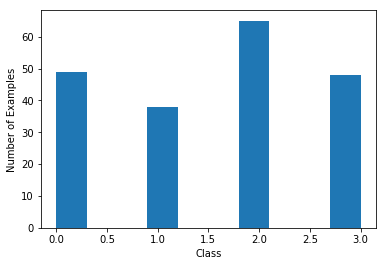

In [4]:
np.random.seed(1)
# On the Mac we tested this on, using this random seed produces a fairly even class balance
# Python is not always consistent across machines with preserving seeded random behavior, 
# so if your histogram shows major class imbalance, change this seed to get better balance

data = np.random.randn(num_dim, num_points)
true_model = {'weights': np.random.randn(num_dim, num_classes)}

labels = linear_predict(data, true_model);
plt.hist(labels)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [5]:
# Create noisy labels
noise_index = np.random.rand(num_points) < 0.3
noisy_labels = labels.copy()
noisy_labels[noise_index] = np.random.randint(0, num_classes, np.count_nonzero(noise_index))

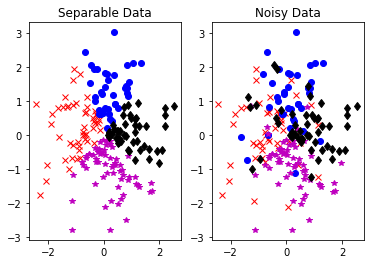

In [6]:
# Plot generated data
markers = ['xr', 'ob', '*m',  'dk']

plt.subplot(121)
for i in range(num_classes):
    plt.plot(data[0, labels == i], data[1, labels == i], markers[i])
plt.title('Separable Data')

plt.subplot(122)
for i in range(num_classes):
    plt.plot(data[0, noisy_labels == i], data[1, noisy_labels == i], markers[i])
plt.title('Noisy Data')

In [9]:
# split into training and testing sets

num_train = int(num_points / 2)
num_test = num_points - num_train

train_data = data[:, :num_train]
test_data = data[:, num_train + 1:]

# store noiseless and noisy labels in tuples

train_labels = {False: labels[:num_train], True: noisy_labels[:num_train]}
test_labels = {False: labels[num_train + 1:], True: noisy_labels[num_train + 1:]}

In [10]:
# Perceptron experiment

epochs = 20

train_accuracy = dict()
test_accuracy = dict()
model = dict()

for is_noisy in (False, True):
    model[is_noisy] = { 'weights': np.zeros((num_dim, num_classes)) }
    train_accuracy[is_noisy] = np.zeros(epochs)
    test_accuracy[is_noisy] = np.zeros(epochs)
 
    for epoch in range(epochs):
        # first measure training and testing accuracy            
        predictions = linear_predict(train_data, model[is_noisy])
        train_accuracy[is_noisy][epoch] = np.sum(predictions == train_labels[is_noisy]) / num_train

        predictions = linear_predict(test_data, model[is_noisy])
        test_accuracy[is_noisy][epoch] = np.sum(predictions == test_labels[is_noisy]) / num_test

        # run perceptron training
        mistakes = 0
        for i in range(num_train):
            correct = perceptron_update(train_data[:, i], model[is_noisy], train_labels[is_noisy][i])
            
            if not correct:
                mistakes += 1
        
        print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Plot results of perceptron training

plt.subplot(121)
train_line = plt.plot(range(epochs), train_accuracy[False], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[False], label="Testing")
plt.title('Separable Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
train_line = plt.plot(range(epochs), train_accuracy[True], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[True], label="Testing")
plt.title('Noisy Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# plot clean predictions

test_predictions = linear_predict(test_data, model[False])
train_predictions = linear_predict(train_data, model[False])

plt.subplot(121)
plot_predictions(train_data, train_labels[False], train_predictions)
plt.title('Training Data')
plt.subplot(122)
plot_predictions(test_data, test_labels[False], test_predictions)
plt.title('Testing Data')

print("Red markers indicate incorrect predictions")

In [ ]:
# Logistic regression gradient check

# first check if the gradient and objective function are consistent with each other
_ = log_reg_train(train_data, train_labels[True], {'lambda': 0.1}, 
              {'weights': np.random.randn(num_dim * num_classes)}, check_gradient=True)

In [ ]:
# Train logistic regression

lambda_vals = 10 ** np.linspace(-9, 2, 12)

train_accuracy = dict()
test_accuracy = dict()
model = dict()

for is_noisy in (False, True):
    model[is_noisy] = {'weights': np.zeros((num_dim, num_classes))}
    
    train_accuracy[is_noisy] = np.zeros(lambda_vals.size)
    test_accuracy[is_noisy] = np.zeros(lambda_vals.size)
    
    for i in range(lambda_vals.size):
        params = {'lambda': lambda_vals[i]}
        
        model[is_noisy] = log_reg_train(train_data, train_labels[is_noisy], params, model[is_noisy])
        
        train_predictions = linear_predict(train_data, model[is_noisy])
        train_accuracy[is_noisy][i] = np.sum(train_predictions == train_labels[is_noisy]) / num_train

        test_predictions = linear_predict(test_data, model[is_noisy])
        test_accuracy[is_noisy][i] = np.sum(test_predictions == test_labels[is_noisy]) / num_test

In [ ]:
# Plot results of logistic regression parameter sweep

plt.subplot(121)
train_line = plt.semilogx(lambda_vals, train_accuracy[False], label="Training")
test_line = plt.semilogx(lambda_vals, test_accuracy[False], label="Testing")
plt.title('Separable Data')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
train_line = plt.semilogx(lambda_vals, train_accuracy[True], label="Training")
test_line = plt.semilogx(lambda_vals, test_accuracy[True], label="Testing")
plt.title('Noisy Data')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# plot clean predictions

test_predictions = linear_predict(test_data, model[False])
train_predictions = linear_predict(train_data, model[False])

plt.subplot(121)
plot_predictions(train_data, train_labels[False], train_predictions)
plt.title('Training Data')
plt.subplot(122)
plot_predictions(test_data, test_labels[False], test_predictions)
plt.title('Testing Data')

print("Red markers indicate incorrect predictions")